                      Null Count
Feature                         
quality                        0
alcohol                        0
sulphates                      0
pH                             0
density                        0
total sulfur dioxide           0
free sulfur dioxide            0
chlorides                      0
residual sugar                 0
citric acid                    0
volatile acidity               0
fixed acidity                  0


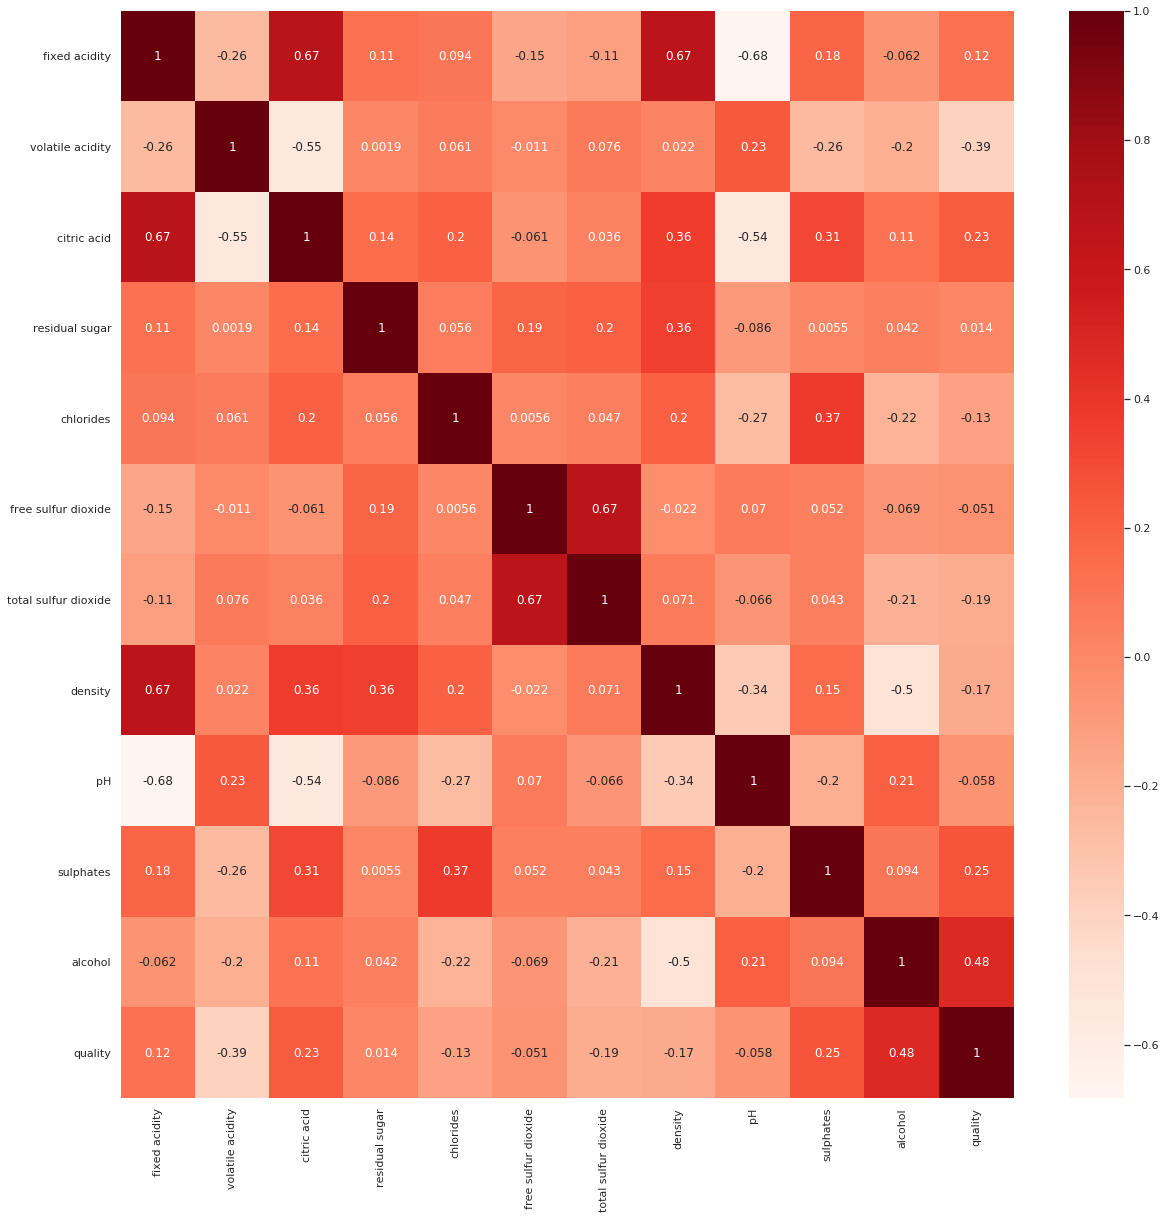

quality          1.000000
alcohol          0.476166
sulphates        0.251397
citric acid      0.226373
fixed acidity    0.124052
Name: quality, dtype: float64 

(1599, 3)
R^2 is: 
 0.3132121041700513
RMSE is: 
 0.4488199140726986


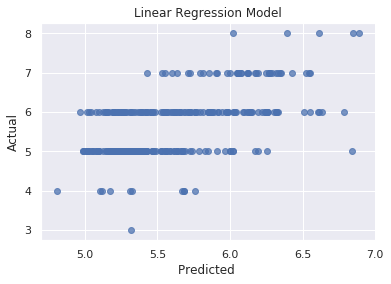

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns; sns.set(color_codes=True)

train = pd.read_csv('/content/drive/My Drive/Python_Lesson5/winequality-red.csv')


## ---Null values---##
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
print(nulls)

## Replacing null values with mean values
data = train.select_dtypes(include=[np.number]).interpolate().dropna()


#Using Pearson Correlation and ploting in the heat map
plt.figure(figsize=(20,20))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

# Printing the correlation with the target feature "quality"
print(cor['quality'].sort_values(ascending=False)[:5],'\n')

##Build a multiple linear regression model
y = data['quality']
X = data[['alcohol', 'sulphates', 'citric acid']]

print(X.shape)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                                    X, y, random_state=42, test_size=.20)
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)
##Evaluate the performance and visualize results
print ("R^2 is: \n", model.score(X_test, y_test))
predictions = model.predict(X_test)
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, predictions))

##visualize

actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.75,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted ')
plt.ylabel('Actual')
plt.title('Linear Regression Model')
plt.show()